This notebook talks to the lebreVna and the arduino which controls the stepper. 

Example code
https://github.com/jankae/LibreVNA/blob/master/Documentation/UserManual/SCPI_Examples/retrieve_trace_data.py

LibreVNA-GUI
Connected to 207635B23750
Setting up the sweep...
Waiting for the sweep to finish...


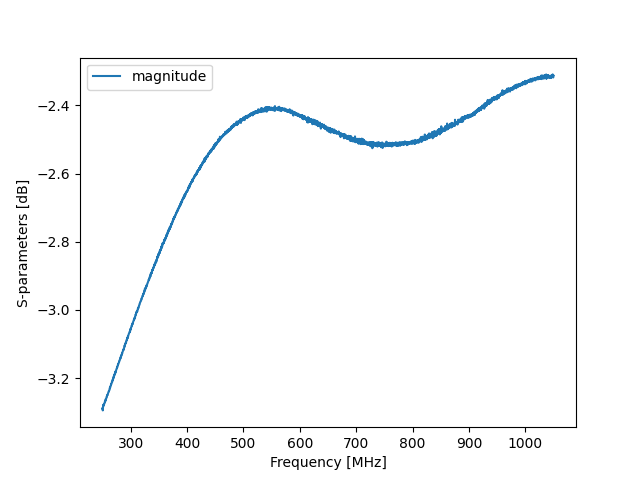

In [9]:
#Set up connection, set up sweep, take test sweep, plot 

import time
from libreVNA import libreVNA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Create the control instance
vna = libreVNA('localhost', 19542)

# Quick connection check (should print "LibreVNA-GUI")
print(vna.query("*IDN?"))

# Make sure we are connecting to a device (just to be sure, with default settings the LibreVNA-GUI auto-connects)
vna.cmd(":DEV:CONN")

dev = vna.query(":DEV:CONN?")
if dev == "Not connected":
    print("Not connected to any device, aborting")
    exit(-1)
else:
    print("Connected to "+dev)
# Simple trace data extraction

print("Setting up the sweep...")
vna.cmd(":DEV:MODE VNA")
vna.cmd(":VNA:SWEEP FREQUENCY")
vna.cmd(":VNA:STIM:LVL -10")
vna.cmd(":VNA:ACQ:IFBW 2500") #IF bandwidth. Basically RBW
vna.cmd(":VNA:ACQ:AVG 1")
vna.cmd(":VNA:ACQ:POINTS 4000") #data points. max = 4501
vna.cmd(":VNA:FREQuency:START 250000000")
vna.cmd(":VNA:FREQuency:STOP 1050000000")

# wait for the sweep to finish
print("Waiting for the sweep to finish...")
while vna.query(":VNA:ACQ:FIN?") == "FALSE":
    time.sleep(0.1)

S11 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S11"))
freqs = [data[0]/1e6 for data in S11] #MHz
sParamComp = [data[1] for data in S11]

if 0:
    plt.figure()
    plt.plot(freqs, np.real(sParamComp), label = 'real')
    plt.plot(freqs, np.imag(sParamComp), label = 'img')
    plt.plot(freqs, np.absolute(sParamComp), label = 'mag')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Linear S-parameters [None]')
    plt.legend()

if 1:
    plt.figure()
    plt.plot(freqs, 20*np.log10(np.absolute(sParamComp)), label = 'magnitude')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('S-parameters [dB]')
    plt.legend()

In [8]:
vna.cmd(":VNA:SWEEP FREQUENCY")
vna.cmd(":VNA:ACQ:POINTS 4000") #data points. max = 4501
vna.cmd(":VNA:FREQuency:START 250000000")
vna.cmd(":VNA:FREQuency:STOP 1050000000")
# wait for the sweep to finish
print("Waiting for the sweep to finish...")
time.sleep(4)
while vna.query(":VNA:ACQ:FIN?") == "FALSE":
    time.sleep(0.1)

S11 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S11"))
S12 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S12")) #S12 = S21 by recaprocity 
S22 = vna.parse_trace_data(vna.query(":VNA:TRACE:DATA? S22"))

print(S11[3])
print(S12[3])
print(S22[3])

Waiting for the sweep to finish...
(250600150.0, (-0.616201+0.296758j))
(250600150.0, (3.88875e-05-1.05038e-05j))
(250600150.0, (0.0170043-0.692982j))
